<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/fb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
chicago_df = pd.read_csv('/content/drive/My Drive/sita.csv',error_bad_lines=False)
chicago_df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [0]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 
                 'X Coordinate', 'Y Coordinate','Updated On','Year', 
                 'FBI Code', 'Beat','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)


In [0]:
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'].astype(str), errors='coerce')
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format = '%d/%m/%Y %H:%M:%S')


In [0]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [7]:
Groups = chicago_df.groupby(chicago_df['Primary Type'])
Groups = dict(list(Groups))
theft_data = [Groups['THEFT'], Groups['ROBBERY']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del chicago_df
theft_data.head(5)


,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2016-05-03 22:00:00,10508699,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True
2016-05-03 17:30:00,10508717,2016-05-03 17:30:00,011XX W JACKSON BLVD,THEFT,FROM BUILDING,OTHER,False,False
2016-05-03 09:00:00,10508724,2016-05-03 09:00:00,028XX S DR MARTIN LUTHER KING JR DR,THEFT,$500 AND UNDER,STREET,False,False
2016-05-03 22:08:00,10508728,2016-05-03 22:08:00,016XX N CLAREMONT AVE,THEFT,OVER $500,STREET,False,False
2016-05-03 21:45:00,10508738,2016-05-03 21:45:00,020XX W LE MOYNE ST,THEFT,OVER $500,STREET,False,False


Text(0, 0.5, 'Number of Crimes')

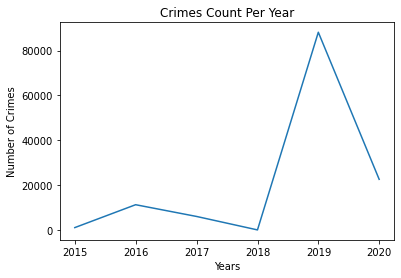

In [8]:
theft_data.resample('Y').size()
plt.plot(theft_data.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

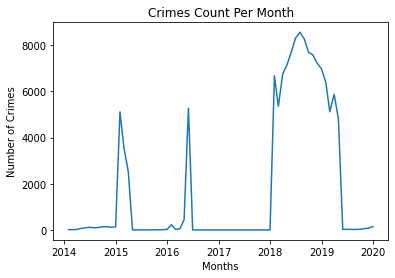

In [9]:
theft_data.resample('M').size().head(), theft_data.resample('M').size().tail()
plt.plot(theft_data.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [10]:
chicago_prophet = theft_data.resample('M').size().reset_index()
chicago_prophet.head(), chicago_prophet.tail()
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet.head(), chicago_prophet.tail()


(        Date  Crime Count
 0 2014-01-31           13
 1 2014-02-28           11
 2 2014-03-31           20
 3 2014-04-30           64
 4 2014-05-31           92,          Date  Crime Count
 67 2019-08-31           20
 68 2019-09-30           27
 69 2019-10-31           55
 70 2019-11-30           77
 71 2019-12-31          143)

In [12]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)
chicago_prophet_df.head(),chicago_prophet_df.tail()


(        Date  Crime Count
 0 2014-01-31           13
 1 2014-02-28           11
 2 2014-03-31           20
 3 2014-04-30           64
 4 2014-05-31           92,          Date  Crime Count
 67 2019-08-31           20
 68 2019-09-30           27
 69 2019-10-31           55
 70 2019-11-30           77
 71 2019-12-31          143)

In [13]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
chicago_prophet_df_final.head(), chicago_prophet_df_final.tail()

(          ds   y
 0 2014-01-31  13
 1 2014-02-28  11
 2 2014-03-31  20
 3 2014-04-30  64
 4 2014-05-31  92,            ds    y
 67 2019-08-31   20
 68 2019-09-30   27
 69 2019-10-31   55
 70 2019-11-30   77
 71 2019-12-31  143)

In [14]:
chicago_prophet_df_final.shape

(72, 2)

In [0]:
train = chicago_prophet_df_final[:62]
test = chicago_prophet_df_final[62:]


In [17]:
train.head()

,ds,y
0,2014-01-31,13
1,2014-02-28,11
2,2014-03-31,20
3,2014-04-30,64
4,2014-05-31,92


In [0]:
m = Prophet()


In [19]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_date = m.make_future_dataframe(periods=365)

In [52]:
future_date

,ds
0,2014-01-31
1,2014-02-28
2,2014-03-31
3,2014-04-30
4,2014-05-31
...,...
422,2020-02-24
423,2020-02-25
424,2020-02-26
425,2020-02-27


In [0]:
prediction =  m.predict(future_date)

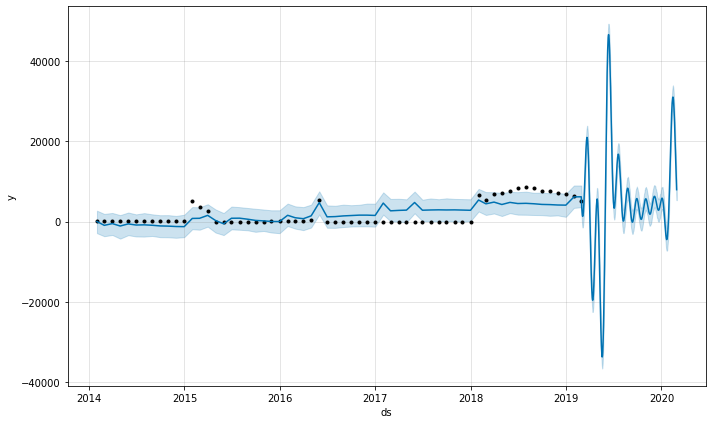

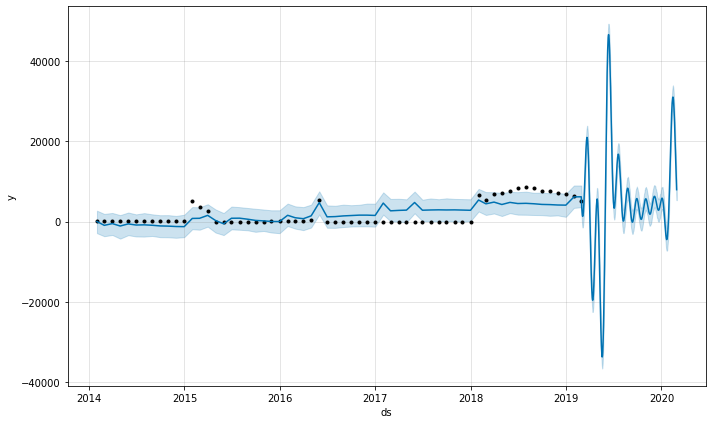

In [54]:
m.plot(prediction)


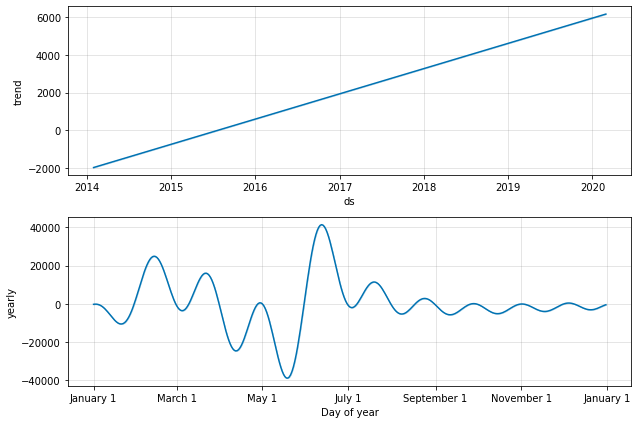

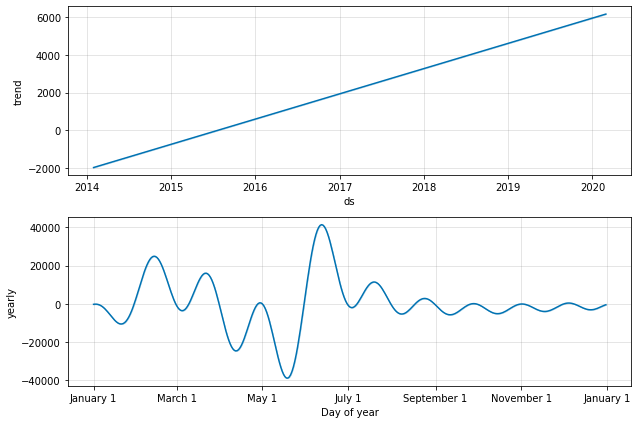

In [55]:
m.plot_components(prediction)

In [56]:
test

,ds,y
62,2019-03-31,5867
63,2019-04-30,4820
64,2019-05-31,21
65,2019-06-30,26
66,2019-07-31,21
67,2019-08-31,20
68,2019-09-30,27
69,2019-10-31,55
70,2019-11-30,77
71,2019-12-31,143


In [57]:
test['dates'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
test

,ds,y,dates
62,2019-03-31,5867,2019-03-31
63,2019-04-30,4820,2019-04-30
64,2019-05-31,21,2019-05-31
65,2019-06-30,26,2019-06-30
66,2019-07-31,21,2019-07-31
67,2019-08-31,20,2019-08-31
68,2019-09-30,27,2019-09-30
69,2019-10-31,55,2019-10-31
70,2019-11-30,77,2019-11-30
71,2019-12-31,143,2019-12-31


In [0]:
test = test.set_index("dates")


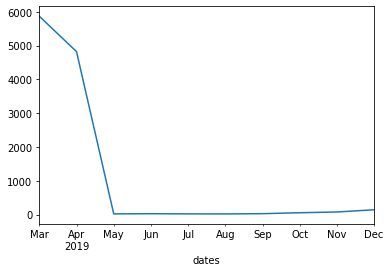

In [60]:
test = test['y']
import matplotlib.pyplot as plt
test.plot()

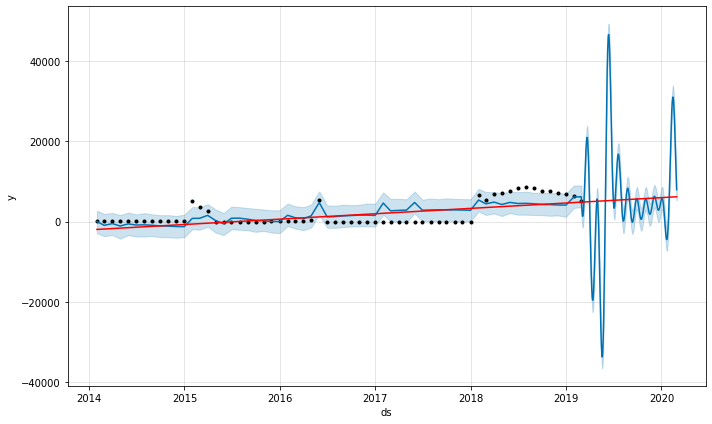

In [61]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)
